In [ ]:
import pandas as pd

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/Concept and technologies of AI/bank.csv")

In [ ]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [ ]:
df.dtypes[df.dtypes == 'object']

,0
job,object
marital,object
education,object
default,object
housing,object
loan,object
contact,object
month,object
poutcome,object
y,object


In [ ]:
df.select_dtypes(include='object').apply(lambda x: x.unique())

,0
job,"[management, technician, entrepreneur, blue-co..."
marital,"[married, single, divorced]"
education,"[tertiary, secondary, unknown, primary]"
default,"[no, yes]"
housing,"[yes, no]"
loan,"[no, yes]"
contact,"[unknown, cellular, telephone]"
month,"[may, jun, jul, aug, oct, nov, dec, jan, feb, ..."
poutcome,"[unknown, failure, other, success]"
y,"[no, yes]"


In [ ]:
df.isnull().sum().index.tolist()

['age',
 'job',
 'marital',
 'education',
 'default',
 'balance',
 'housing',
 'loan',
 'contact',
 'day',
 'month',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'y']

In [ ]:
bank=df.select_dtypes(exclude='object')
bank.to_csv('banknumericdata.csv', index=False)

In [ ]:
df=pd.read_csv("/content/banknumericdata.csv")

In [ ]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [ ]:
df=pd.read_csv("/content/drive/MyDrive/Concept and technologies of AI/dataset/medical_students_dataset.csv")

In [ ]:
df.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Student ID      180000 non-null  float64
 1   Age             180000 non-null  float64
 2   Gender          180000 non-null  object 
 3   Height          180000 non-null  float64
 4   Weight          180000 non-null  float64
 5   Blood Type      180000 non-null  object 
 6   BMI             180000 non-null  float64
 7   Temperature     180000 non-null  float64
 8   Heart Rate      180000 non-null  float64
 9   Blood Pressure  180000 non-null  float64
 10  Cholesterol     180000 non-null  float64
 11  Diabetes        180000 non-null  object 
 12  Smoking         180000 non-null  object 
dtypes: float64(9), object(4)
memory usage: 19.8+ MB


In [ ]:
df.isnull().sum()

,0
Student ID,20000
Age,20000
Gender,20000
Height,20000
Weight,20000
Blood Type,20000
BMI,20000
Temperature,20000
Heart Rate,20000
Blood Pressure,20000


In [ ]:
missing_cols = df.columns[df.isnull().any()].tolist()
print("Columns with missing values:", missing_cols)

for col in missing_cols:
    if df[col].dtype == 'object':
        mode_val = df[col].mode()[0] if not df[col].mode().empty else 'Unknown'
        df[col].fillna(mode_val, inplace=True)
        print(f"Filled missing values in '{col}' (categorical) with mode: {mode_val}")
    else:
        median_val = df[col].median()
        df[col].fillna(median_val, inplace=True)
        print(f"Filled missing values in '{col}' (numerical) with median: {median_val:.2f}")

Columns with missing values: ['Student ID', 'Age', 'Gender', 'Height', 'Weight', 'Blood Type', 'BMI', 'Temperature', 'Heart Rate', 'Blood Pressure', 'Cholesterol', 'Diabetes', 'Smoking']
Filled missing values in 'Student ID' (numerical) with median: 49943.50
Filled missing values in 'Age' (numerical) with median: 26.00
Filled missing values in 'Gender' (categorical) with mode: Male
Filled missing values in 'Height' (numerical) with median: 174.90
Filled missing values in 'Weight' (numerical) with median: 69.98
Filled missing values in 'Blood Type' (categorical) with mode: B
Filled missing values in 'BMI' (numerical) with median: 22.67
Filled missing values in 'Temperature' (numerical) with median: 98.60
Filled missing values in 'Heart Rate' (numerical) with median: 80.00
Filled missing values in 'Blood Pressure' (numerical) with median: 115.00


/tmp/ipython-input-3703082261.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(median_val, inplace=True)
/tmp/ipython-input-3703082261.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df

Filled missing values in 'Cholesterol' (numerical) with median: 184.00
Filled missing values in 'Diabetes' (categorical) with mode: No
Filled missing values in 'Smoking' (categorical) with mode: No


In [ ]:
# Count duplicate rows (entire row identical)
num_duplicates = df.duplicated().sum()
print(f"\nNumber of duplicate rows: {num_duplicates}")

# View duplicates (optional)
if num_duplicates > 0:
    print("\nSample duplicates:")
    print(df[df.duplicated(keep=False)])  # show all instances

# Remove duplicates (keep first occurrence)
df.drop_duplicates(inplace=True)
print(f"\nAfter removal, DataFrame shape: {df.shape}")


Number of duplicate rows: 12879

Sample duplicates:
        Student ID   Age  Gender      Height     Weight Blood Type        BMI  \
7              8.0  28.0    Male  186.489402  52.389752         AB  15.063921   
11            12.0  34.0  Female  182.416302  76.371050         AB  22.950992   
18            19.0  31.0  Female  158.790160  46.829849         AB  18.572723   
22            23.0  29.0  Female  179.909041  90.679436         AB  28.015787   
23            24.0  18.0    Male  174.899914  52.521560         AB  13.570402   
...            ...   ...     ...         ...        ...        ...        ...   
199965     99966.0  22.0  Female  166.562901  48.684146         AB  17.548137   
199973     99974.0  25.0  Female  156.297842  90.690186          B  37.123963   
199983     99984.0  26.0    Male  185.126825  95.531874          O  27.874661   
199985     99986.0  23.0  Female  162.884951  82.485778          B  31.089745   
199988     99989.0  28.0    Male  160.443722  55.688170 

In [3]:
import pandas as pd
df=pd.read_csv("/content/drive/MyDrive/Concept and technologies of AI/dataset/Titanic-Dataset.csv")

In [4]:
subset_df = df[['Name', 'Pclass', 'Sex', 'Age', 'Fare', 'Survived']]

first_class_df = subset_df[subset_df['Pclass'] == 1]

fare_mean = first_class_df['Fare'].mean()
fare_median = first_class_df['Fare'].median()
fare_max = first_class_df['Fare'].max()
fare_min = first_class_df['Fare'].min()

print("Fare Statistics for First-Class Passengers:")
print(f"Mean:    {fare_mean:.2f}")
print(f"Median:  {fare_median:.2f}")
print(f"Max:     {fare_max}")
print(f"Min:     {fare_min}")

Fare Statistics for First-Class Passengers:
Mean:    84.15
Median:  60.29
Max:     512.3292
Min:     0.0


In [5]:
null_age_count = first_class_df['Age'].isnull().sum()
print(f"\nNumber of null values in 'Age': {null_age_count}")

# Drop rows with null 'Age'
first_class_df_clean = first_class_df.dropna(subset=['Age'])

# Optional: Reset index if needed
first_class_df_clean.reset_index(drop=True, inplace=True)

print(f"Rows after dropping null 'Age': {len(first_class_df_clean)}")


Number of null values in 'Age': 30
Rows after dropping null 'Age': 186


In [6]:
# Make sure 'Embarked' exists in the original DataFrame
if 'Embarked' in df.columns:
    # Perform one-hot encoding
    embarked_dummies = pd.get_dummies(df['Embarked'], prefix='Embarked')

    # Add the dummy columns to the original DataFrame
    df_encoded = pd.concat([df, embarked_dummies], axis=1)

    # Drop the original 'Embarked' column
    df_encoded.drop('Embarked', axis=1, inplace=True)

    # Print first few rows to verify
    print("\nFirst few rows after one-hot encoding 'Embarked':")
    print(df_encoded[['Embarked_C', 'Embarked_Q', 'Embarked_S']].head())
else:
    print("Column 'Embarked' not found in the dataset.")


First few rows after one-hot encoding 'Embarked':
   Embarked_C  Embarked_Q  Embarked_S
0       False       False        True
1        True       False       False
2       False       False        True
3       False       False        True
4       False       False        True


Mean Survival Rate by Sex:
sex
female    0.742038
male      0.188908
Name: survived, dtype: float64


/tmp/ipython-input-1297688805.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=survival_by_sex.index, y=survival_by_sex.values, palette='Set2')


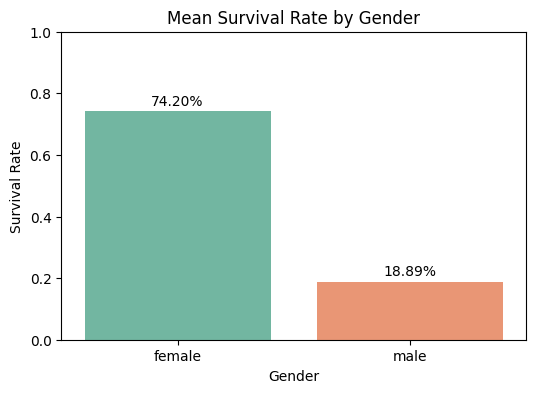

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Load the Titanic dataset from Seaborn
df = sns.load_dataset('titanic')

# --------------------------------------------------
# Problem 4: Compare mean survival rates by 'Sex'
# --------------------------------------------------
survival_by_sex = df.groupby('sex')['survived'].mean()

print("Mean Survival Rate by Sex:")
print(survival_by_sex)

# Visualization
plt.figure(figsize=(6, 4))
sns.barplot(x=survival_by_sex.index, y=survival_by_sex.values, palette='Set2')
plt.title('Mean Survival Rate by Gender')
plt.ylabel('Survival Rate')
plt.xlabel('Gender')
plt.ylim(0, 1)
for i, v in enumerate(survival_by_sex.values):
    plt.text(i, v + 0.02, f"{v:.2%}", ha='center')
plt.show()

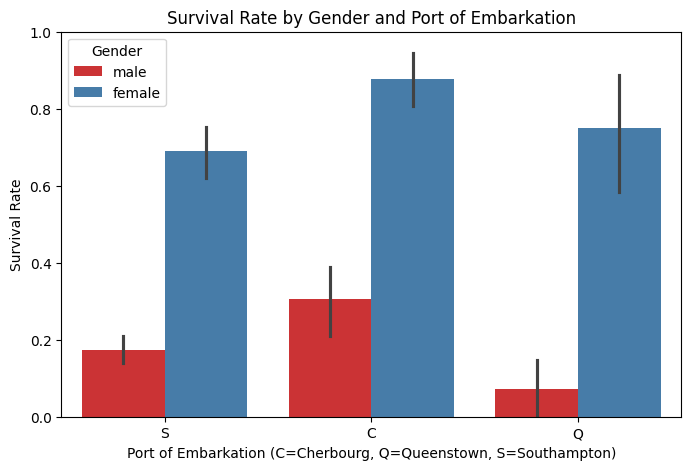

In [8]:
plt.figure(figsize=(8, 5))
sns.barplot(
    data=df,
    x='embarked',
    y='survived',
    hue='sex',
    palette='Set1'
)
plt.title('Survival Rate by Gender and Port of Embarkation')
plt.ylabel('Survival Rate')
plt.xlabel('Port of Embarkation (C=Cherbourg, Q=Queenstown, S=Southampton)')
plt.legend(title='Gender')
plt.ylim(0, 1)
plt.show()

/tmp/ipython-input-3696271980.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival_age_pclass = df_age.groupby(['pclass', 'age_group'])['survived'].mean().reset_index()


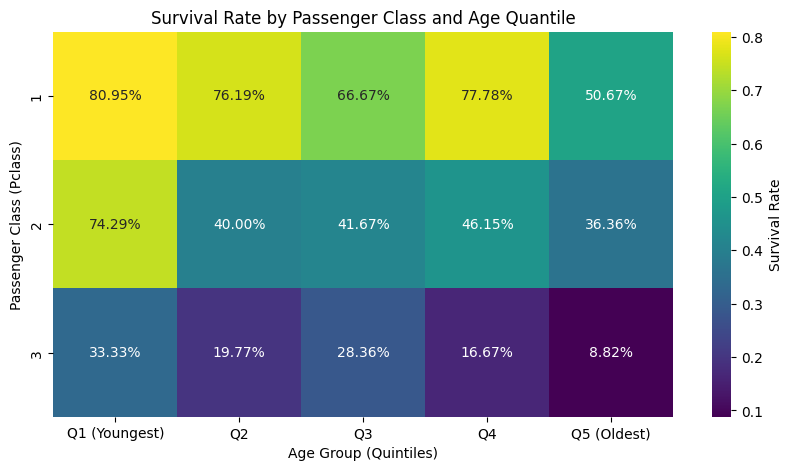

In [9]:
# Drop missing Age values (required for quantile calculation)
df_age = df.dropna(subset=['age']).copy()

# Create 5 age quantiles (quintiles)
df_age['age_group'] = pd.qcut(df_age['age'], q=5, labels=['Q1 (Youngest)', 'Q2', 'Q3', 'Q4', 'Q5 (Oldest)'])

# Compute mean survival by Pclass and age_group
survival_age_pclass = df_age.groupby(['pclass', 'age_group'])['survived'].mean().reset_index()

# Pivot for heatmap
heatmap_data = survival_age_pclass.pivot(index='pclass', columns='age_group', values='survived')

# Visualization: Heatmap
plt.figure(figsize=(10, 5))
sns.heatmap(
    heatmap_data,
    annot=True,
    fmt=".2%",
    cmap='viridis',
    cbar_kws={'label': 'Survival Rate'}
)
plt.title('Survival Rate by Passenger Class and Age Quantile')
plt.ylabel('Passenger Class (Pclass)')
plt.xlabel('Age Group (Quintiles)')
plt.show()